# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
!pip install tensorflow[and-cuda] numpy==1.25.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.17.1


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
images = np.load('/content/drive/My Drive/Colab Notebooks/Helmet/images_proj.npy')
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Helmet/Labels_proj.csv')

# **Exploratory Data Analysis**

In [6]:
print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


There are 631 BGR  images of shape 200 x 200 X 3, each image having 3 channels.

In [7]:
labels.head(5)

Label
0      1
1      1
2      1
3      1
4      1

In [8]:
labels.value_counts()

Label
0        320
1        311
Name: count, dtype: int64

In [9]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Label   631 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


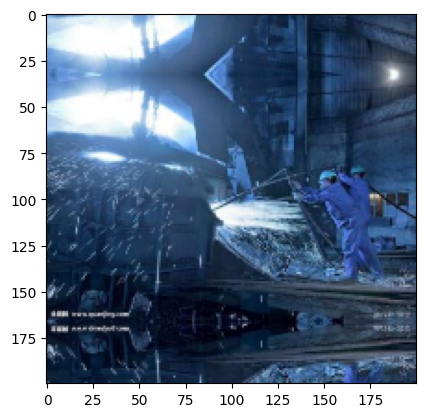

In [10]:
plt.imshow(images[5])

###Plot random images from each of the classes and print their corresponding labels.

In [11]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [12]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

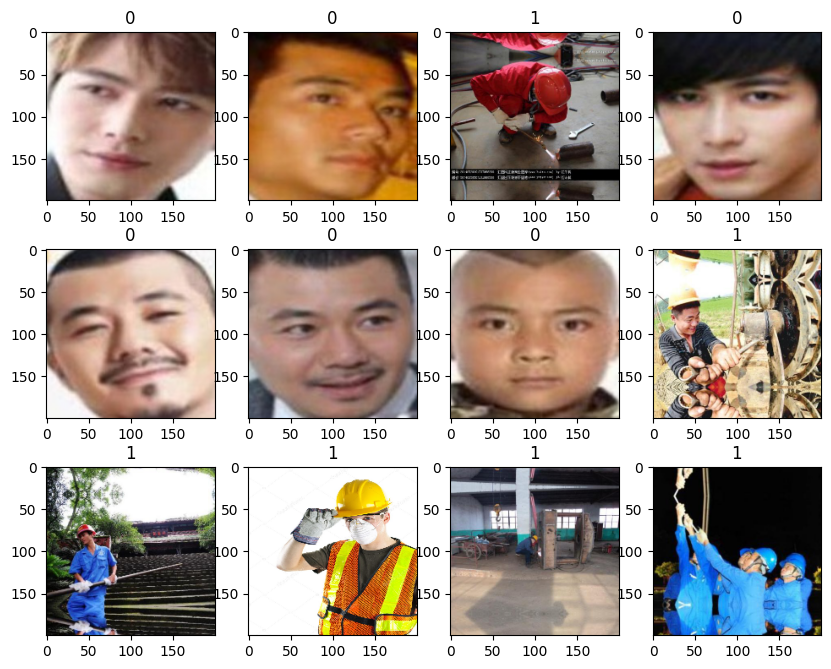

In [13]:
plot_images(images,labels)

## Checking for class imbalance


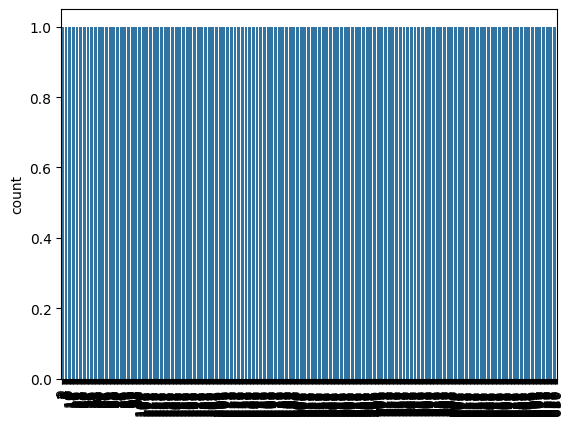

In [14]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical');

- As we can see from the above plot, the dataset is quite balanced.


# **Data Preprocessing**

## Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 200 to 64.

In [15]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

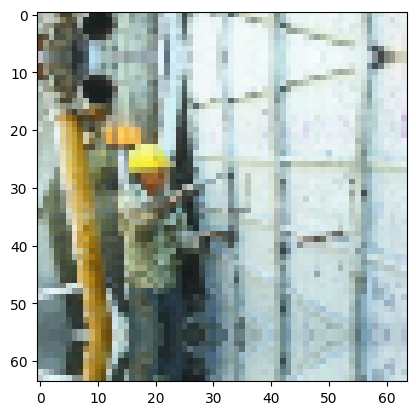

In [16]:
plt.imshow(images_decreased[3]);

## Visualizing images using Gaussian Blur

In [17]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
    images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))

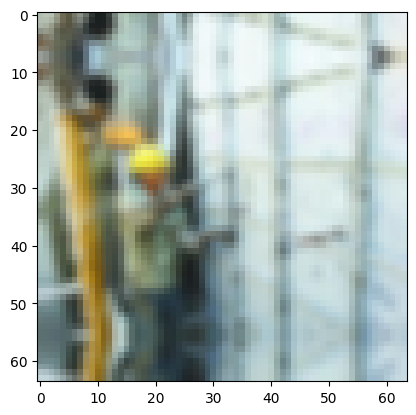

In [18]:
plt.imshow(images_gb[3]);

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## Converting images to grayscale


In [19]:
gray_images = []
for i in range(len(images)):
  gray_images.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))

In [20]:
# Function to plot the original and processed images side by side
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if gray:
      axes[1].imshow(img2,cmap='gray')
    else:
      axes[1].imshow(img2)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.show()

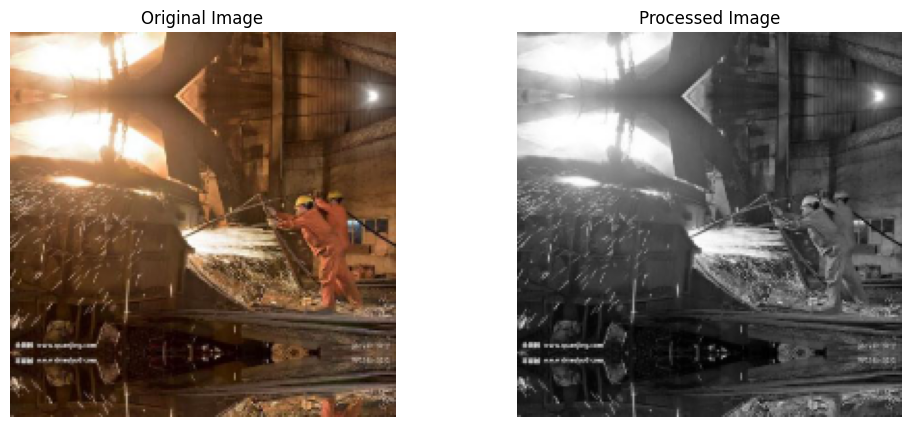

In [21]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(images[n],gray_images[n],gray=True)

In [22]:
images_decreased_gray = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(gray_images)):
  images_decreased_gray.append( cv2.resize(gray_images[i], dimensions, interpolation=cv2.INTER_LINEAR))

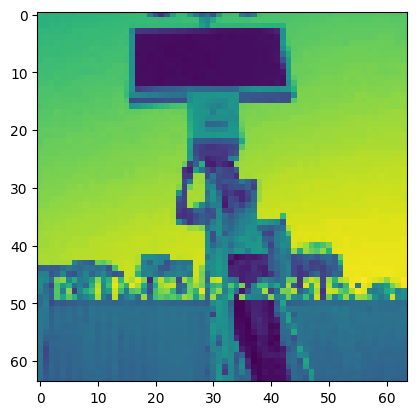

In [23]:
plt.imshow(images_decreased_gray[7]);


### Splitting the dataset



In [24]:
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_decreased),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.


In [25]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(504, 64, 64, 3) (504, 1)
(63, 64, 64, 3) (63, 1)
(64, 64, 64, 3) (64, 1)


### Splitting the gray dataset


In [26]:
X_train_gray, X_temp_gray, y_train_gray, y_temp_gray = train_test_split(np.array(images_decreased_gray),labels , test_size=0.2, random_state=42,stratify=labels)
X_val_gray, X_test_gray, y_val_gray, y_test_gray = train_test_split(X_temp_gray,y_temp_gray , test_size=0.5, random_state=42,stratify=y_temp)

In [27]:
print(X_train_gray.shape,y_train.shape)
print(X_val_gray.shape,y_val.shape)
print(X_test_gray.shape,y_test.shape)

(504, 64, 64) (504, 1)
(63, 64, 64) (63, 1)
(64, 64, 64) (64, 1)


### Data Normalization

In [28]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Since the image pixel values range from 0-255, our method of normalization here will be scaling- we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

### Gray Data Normalization

In [29]:
# Normalizing the image pixels
X_train_normalized_gray = X_train_gray.astype('float32')/255.0
X_val_normalized_gray = X_val_gray.astype('float32')/255.0
X_test_normalized_gray = X_test_gray.astype('float32')/255.0

## Utility Functions

In [30]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [31]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

# **Model Building**

##Model Evaluation Criterion

##Model 1: Simple Convolutional Neural Network (CNN)

In [32]:
# Intializing a sequential model
model_0 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension
model_0.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model_0.add(MaxPooling2D((4, 4), padding = 'same'))

model_0.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model_0.add(MaxPooling2D((4, 4), padding = 'same'))
model_0.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model_0.add(MaxPooling2D((4, 4), padding = 'same'))


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_0.add(Flatten())

# Adding a fully connected dense layer
model_0.add(Dense(4, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation functions since this is a binary classification problem
model_0.add(Dense(1, activation='sigmoid'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_0.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,337 (28.66 KB)

 Trainable params: 7,337 (28.66 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history_0 = model_0.fit(
            X_train_normalized_gray, y_train_gray,
            epochs=15,
            validation_split=0.1,
            shuffle=True,
            batch_size=64,
            verbose=2
)

Epoch 1/15
8/8 - 6s - 788ms/step - accuracy: 0.5166 - loss: 0.6959 - val_accuracy: 0.6471 - val_loss: 0.6924
Epoch 2/15
8/8 - 0s - 60ms/step - accuracy: 0.6976 - loss: 0.6903 - val_accuracy: 0.6078 - val_loss: 0.6832
Epoch 3/15
8/8 - 0s - 13ms/step - accuracy: 0.5960 - loss: 0.6809 - val_accuracy: 0.5882 - val_loss: 0.6666
Epoch 4/15
8/8 - 0s - 12ms/step - accuracy: 0.6049 - loss: 0.6649 - val_accuracy: 0.6078 - val_loss: 0.6403
Epoch 5/15
8/8 - 0s - 17ms/step - accuracy: 0.6468 - loss: 0.6398 - val_accuracy: 0.7255 - val_loss: 0.6007
Epoch 6/15
8/8 - 0s - 12ms/step - accuracy: 0.7020 - loss: 0.6029 - val_accuracy: 0.8039 - val_loss: 0.5500
Epoch 7/15
8/8 - 0s - 13ms/step - accuracy: 0.7815 - loss: 0.5555 - val_accuracy: 0.9216 - val_loss: 0.4997
Epoch 8/15
8/8 - 0s - 16ms/step - accuracy: 0.8366 - loss: 0.5024 - val_accuracy: 0.9608 - val_loss: 0.4851
Epoch 9/15
8/8 - 0s - 17ms/step - accuracy: 0.8830 - loss: 0.4714 - val_accuracy: 0.9804 - val_loss: 0.4561
Epoch 10/15
8/8 - 0s - 17ms

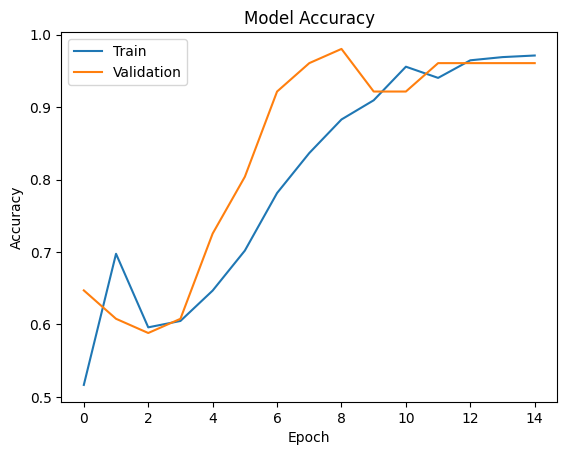

In [34]:
plt.plot(history_0.history['accuracy'])
plt.plot(history_0.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
model_0_train_perf = model_performance_classification(model_0, X_train_normalized_gray,y_train_gray)

print("Train performance metrics")
print(model_0_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.968254  0.968254   0.969296  0.968224


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


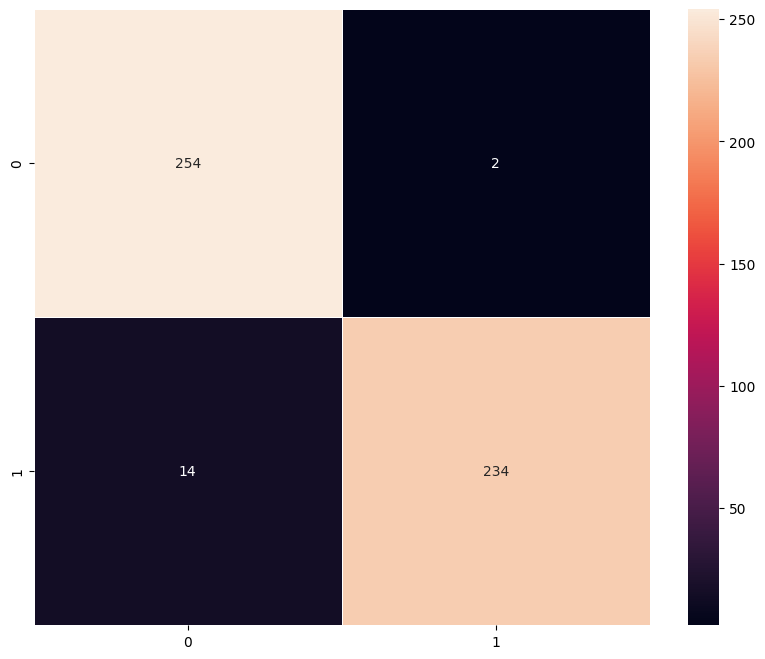

In [36]:
plot_confusion_matrix(model_0,X_train_normalized_gray,y_train_gray)


In [37]:
model_0_valid_perf = model_performance_classification(model_0, X_val_normalized_gray,y_val_gray)

print("Validation performance metrics")
print(model_0_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.968254  0.968254   0.970121  0.968206


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


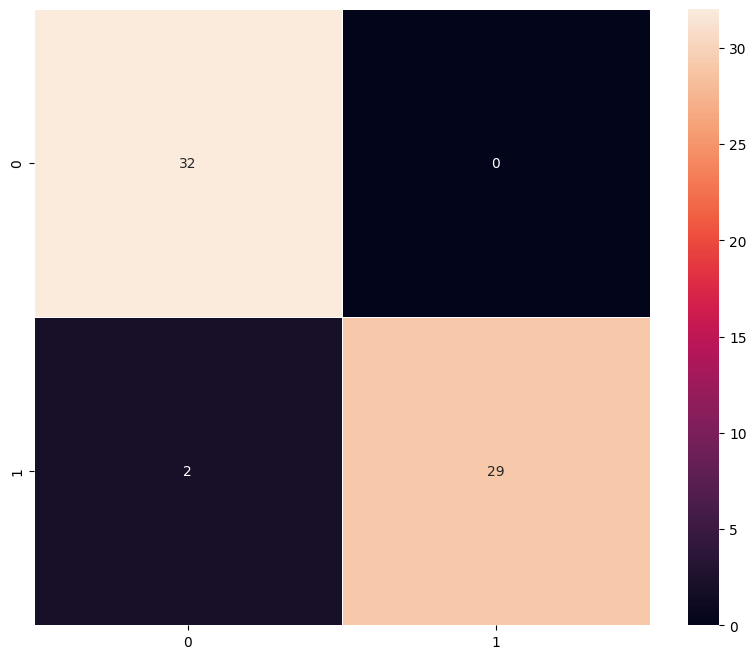

In [38]:
plot_confusion_matrix(model_0,X_val_normalized_gray,y_val_gray)


### Vizualizing the predictions

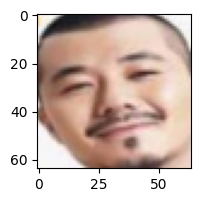

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
Predicted Label [[0.47075915]]
True Label 0


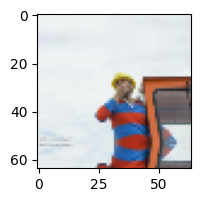

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Label [[0.47030857]]
True Label 1


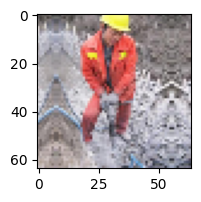

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Label [[0.47295505]]
True Label 1


In [39]:
# Visualizing the predicted and correct label of images from test data

# Rebuild the model architecture
model_0 = Sequential()
model_0.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 1)))
model_0.add(MaxPooling2D((4, 4), padding = 'same'))
model_0.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model_0.add(MaxPooling2D((4, 4), padding = 'same'))
model_0.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model_0.add(MaxPooling2D((4, 4), padding = 'same'))
model_0.add(Flatten())
model_0.add(Dense(4, activation='relu'))
model_0.add(Dense(1, activation='sigmoid'))
opt = Adam()
model_0.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Load the weights from the trained model
# Note: This assumes the weights were saved previously.
# If not, you would need to re-train the model before this cell.
# As the model was trained in the current session, we can skip loading weights.


plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', model_0.predict((X_val_normalized_gray[2].reshape(1,64,64,1))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_val_gray.iloc[2]['Label'])                  # using inverse_transform() to get the output label from the output vector


plt.figure(figsize=(2,2))
plt.imshow(X_val[13])
plt.show()
print('Predicted Label', model_0.predict((X_val_normalized_gray[13].reshape(1,64,64,1))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_val_gray.iloc[13]['Label'])



plt.figure(figsize=(2,2))
plt.imshow(X_val[50])
plt.show()
print('Predicted Label', model_0.predict((X_val_normalized_gray[50].reshape(1,64,64,1))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_val_gray.iloc[50]['Label'])                                              # using inverse_transform() to get the output label from the output vector

## Model 2: (VGG-16 (Base))

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.


In [40]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [42]:
model_1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_1.add(Flatten())

# Adding a dense output layer
model_1.add(Dense(1, activation='sigmoid'))

In [43]:
opt=Adam()
# Compile model
model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# Generating the summary of the model
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,716,737 (56.14 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
train_datagen = ImageDataGenerator()

In [46]:
# Epochs
epochs = 20
# Batch size
batch_size = 128

history_vgg16 = model_1.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.6235 - loss: 0.6233 - val_accuracy: 0.8571 - val_loss: 0.5406
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8203 - loss: 0.5359 - val_accuracy: 0.9048 - val_loss: 0.4957
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9316 - loss: 0.4339 - val_accuracy: 0.9365 - val_loss: 0.3846
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9453 - loss: 0.3661 - val_accuracy: 0.9524 - val_loss: 0.3541
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9677 - loss: 0.3102 - val_accuracy: 0.9524 - val_loss: 0.2786
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9844 - loss: 0.2485 - val_accuracy: 0.9683 - val_loss: 0.2581
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9797 - loss: 0.2302 - val_accuracy: 1.0000 - val_loss: 0.2098
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9766 - loss: 0.2050 - val_accuracy: 1.0000 - val_loss: 0.1970
E

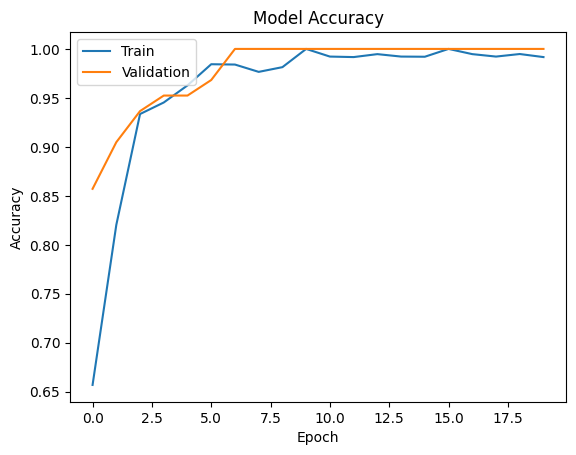

In [47]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [48]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train)

print("Train performance metrics")
print(model_1_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.994048  0.994048   0.994056  0.994048


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


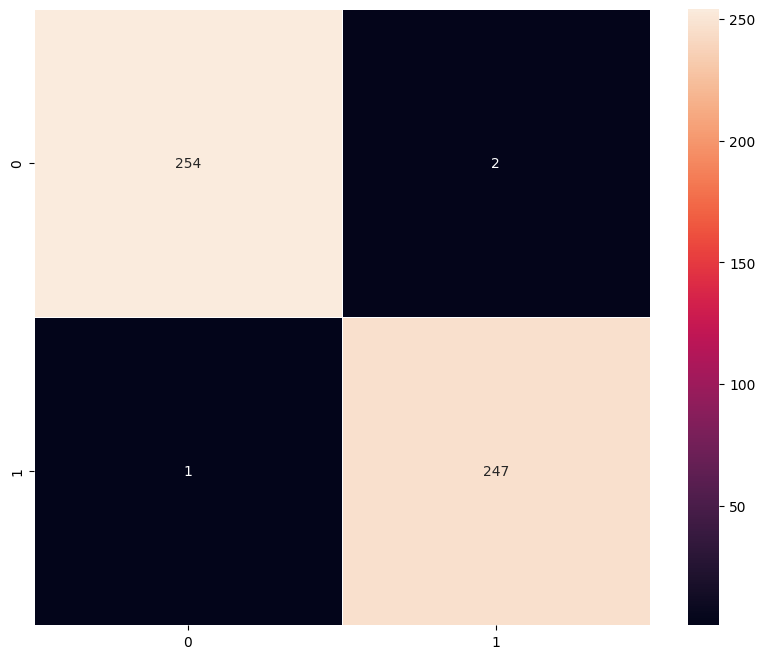

In [49]:
plot_confusion_matrix(model_1,X_train_normalized,y_train)

In [50]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_1_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


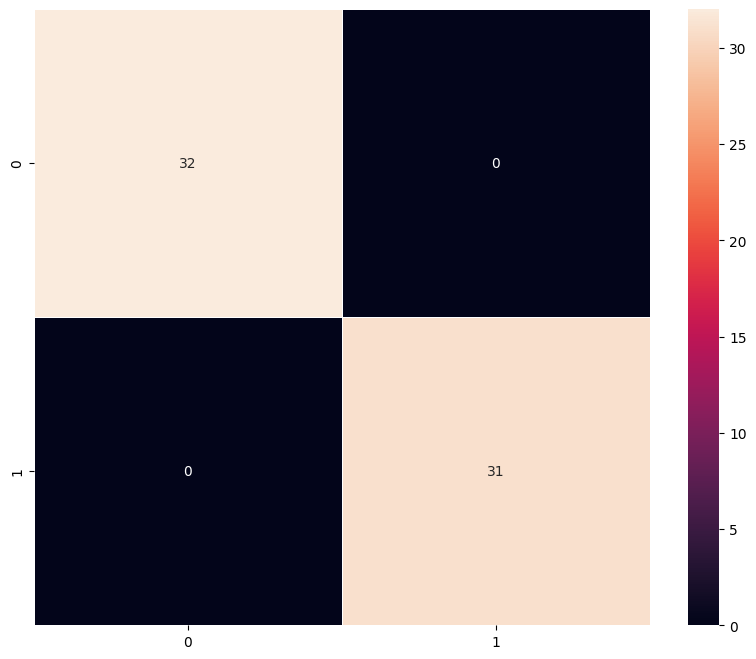

In [51]:
plot_confusion_matrix(model_1,X_val_normalized,y_val)

#### Visualizing the prediction:

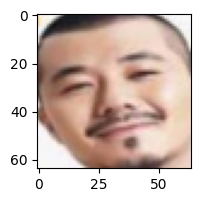

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
Predicted Label [[0.00909297]]
True Label 0


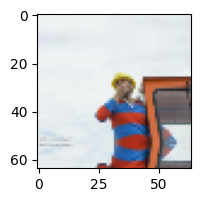

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Label [[0.9331852]]
True Label 1


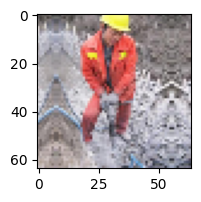

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label [[0.9378132]]
True Label 1


In [52]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', model_1.predict((X_val_normalized[2].reshape(1,64,64,3))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_test.iloc[2]['Label'])                  # using inverse_transform() to get the output label from the output vector


plt.figure(figsize=(2,2))
plt.imshow(X_val[13])
plt.show()
print('Predicted Label', model_1.predict((X_val_normalized[13].reshape(1,64,64,3))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_test.iloc[13]['Label'])



plt.figure(figsize=(2,2))
plt.imshow(X_val[50])
plt.show()
print('Predicted Label', model_1.predict((X_val_normalized[50].reshape(1,64,64,3))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_test.iloc[50]['Label'])                                              # using inverse_transform() to get the output label from the output vector

## Model 3: (VGG-16 (Base + FFNN))

- We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.


In [53]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

#Adding the Feed Forward neural network
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(rate=0.4))
model_2.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_2.add(Dense(1, activation='sigmoid'))

In [54]:
opt = Adam()

In [55]:
# Compile model
model_2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,247,489 (58.16 MB)

 Trainable params: 532,801 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [57]:
history_vgg16 = model_2.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6877 - loss: 0.5456 - val_accuracy: 0.9841 - val_loss: 0.1139
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9844 - loss: 0.1228 - val_accuracy: 1.0000 - val_loss: 0.0544
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9885 - loss: 0.0546 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9855 - loss: 0.0241 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0020
Ep

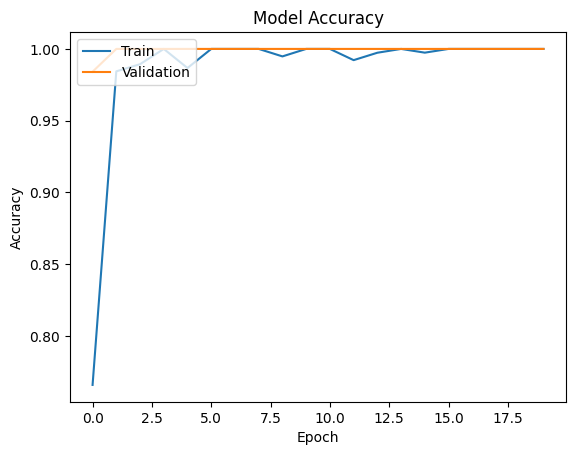

In [58]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [59]:
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train)

print("Train performance metrics")
print(model_2_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


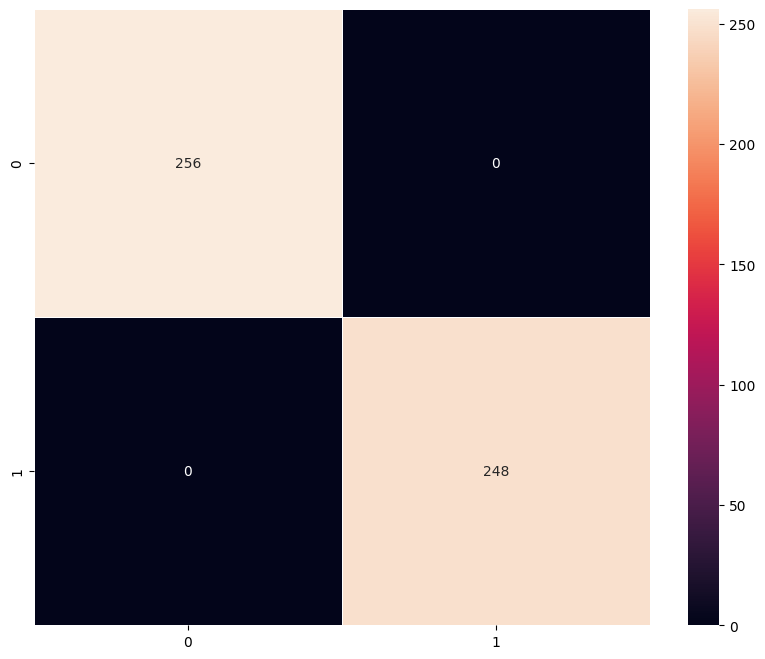

In [60]:
plot_confusion_matrix(model_2,X_train_normalized,y_train)

In [61]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_2_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


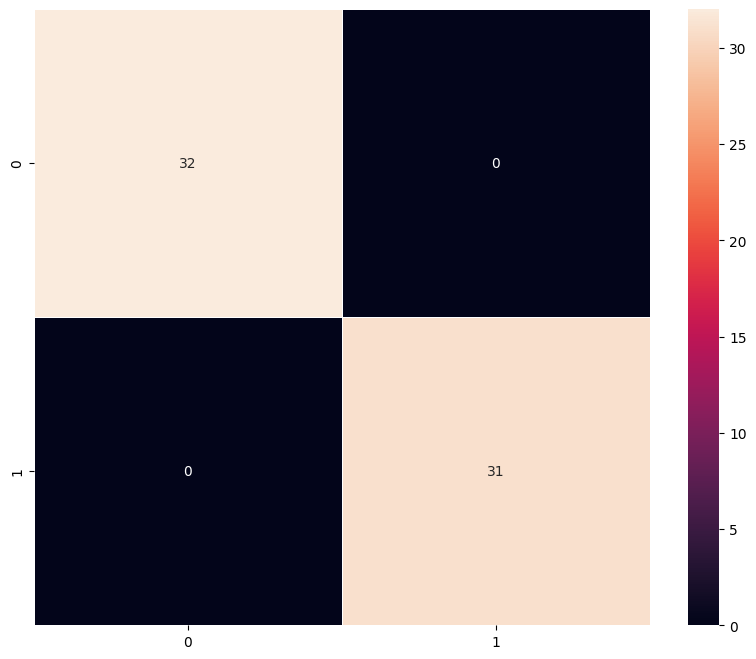

In [62]:
plot_confusion_matrix(model_2,X_val_normalized,y_val)

#### Visualizing the prediction:

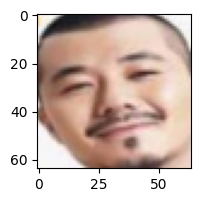

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Predicted Label [[3.4633503e-09]]
True Label 0


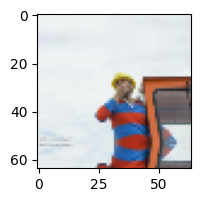

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label [[0.9999604]]
True Label 1


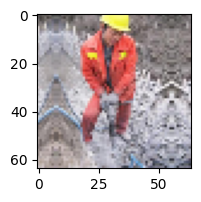

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Label [[0.9999994]]
True Label 1


In [63]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', model_2.predict((X_val_normalized[2].reshape(1,64,64,3))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_test.iloc[2]['Label'])                  # using inverse_transform() to get the output label from the output vector


plt.figure(figsize=(2,2))
plt.imshow(X_val[13])
plt.show()
print('Predicted Label', model_2.predict((X_val_normalized[13].reshape(1,64,64,3))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_test.iloc[13]['Label'])



plt.figure(figsize=(2,2))
plt.imshow(X_val[50])
plt.show()
print('Predicted Label', model_2.predict((X_val_normalized[50].reshape(1,64,64,3))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_test.iloc[50]['Label'])                                              # using inverse_transform() to get the output label from the output vector

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [64]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(1, activation='sigmoid'))

In [65]:
opt=Adam()
# Compile model
model_3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,247,489 (58.16 MB)

 Trainable params: 532,801 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [67]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.3,zoom_range=0.4
                              )

In [68]:
history_vgg16 = model_3.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5482 - loss: 0.7424 - val_accuracy: 0.9524 - val_loss: 0.3123
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9297 - loss: 0.4049 - val_accuracy: 1.0000 - val_loss: 0.2331
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.8793 - loss: 0.3364 - val_accuracy: 1.0000 - val_loss: 0.0734
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9609 - loss: 0.1759 - val_accuracy: 0.9683 - val_loss: 0.0768
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.9578 - loss: 0.1396 - val_accuracy: 0.9524 - val_loss: 0.0717
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9531 - loss: 0.1323 - val_accuracy: 0.9841 - val_loss: 0.0476
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.9707 - loss: 0.0946 - val_accuracy: 1.0000 - val_loss: 0.0141
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9766 - loss: 0.0618 - val_accuracy: 1.0000 - val_loss: 0.0103

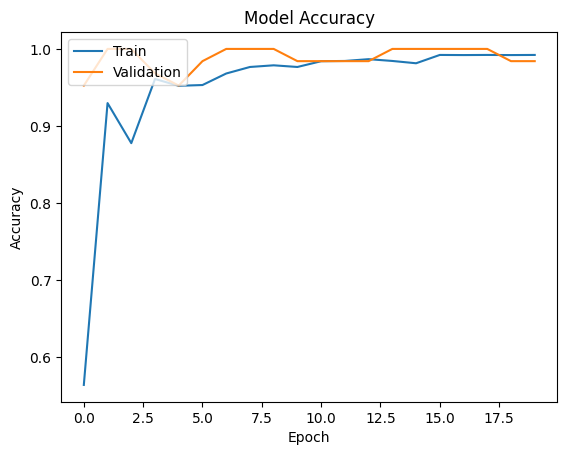

In [69]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train)

print("Train performance metrics")
print(model_3_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


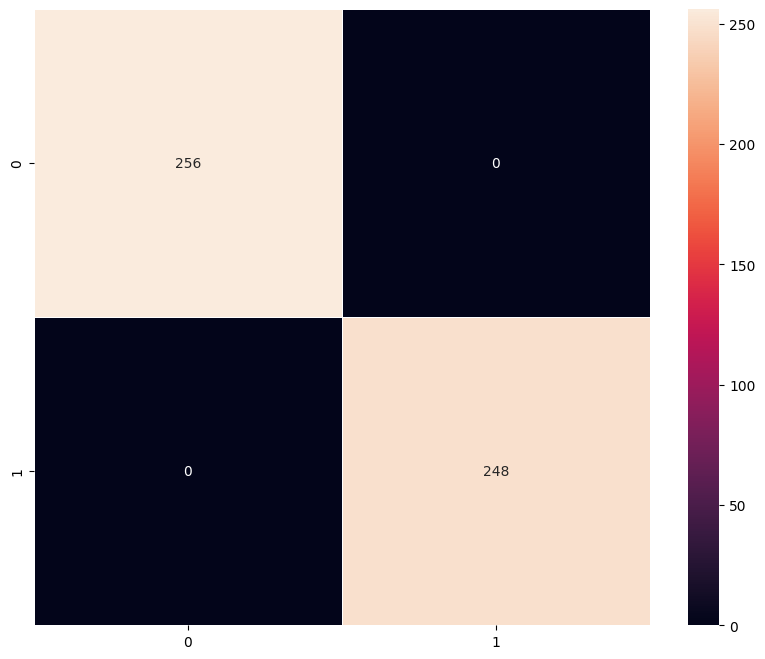

In [71]:
plot_confusion_matrix(model_3,X_train_normalized,y_train)

In [72]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.984127  0.984127   0.984608  0.984119


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


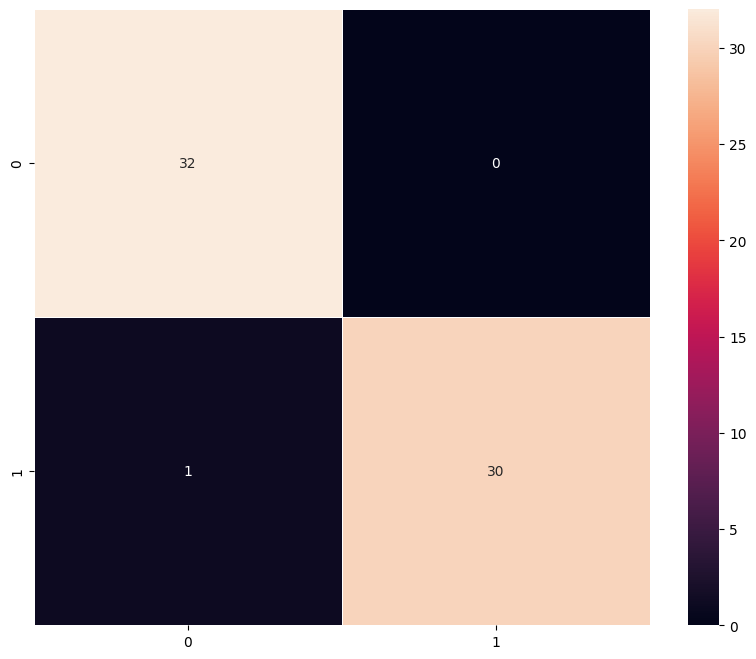

In [73]:
plot_confusion_matrix(model_3,X_val_normalized,y_val)

#### Visualizing the prediction:

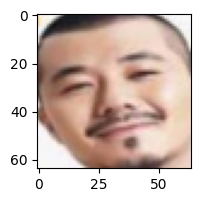

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Predicted Label [[3.2005505e-06]]
True Label 0


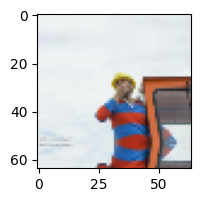

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Label [[0.99813324]]
True Label 1


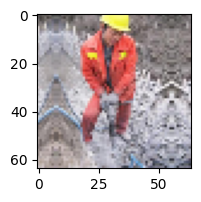

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Label [[0.99998474]]
True Label 1


In [74]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', model_3.predict((X_val_normalized[2].reshape(1,64,64,3))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_test.iloc[2]['Label'])                  # using inverse_transform() to get the output label from the output vector


plt.figure(figsize=(2,2))
plt.imshow(X_val[13])
plt.show()
print('Predicted Label', model_3.predict((X_val_normalized[13].reshape(1,64,64,3))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_test.iloc[13]['Label'])



plt.figure(figsize=(2,2))
plt.imshow(X_val[50])
plt.show()
print('Predicted Label', model_3.predict((X_val_normalized[50].reshape(1,64,64,3))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', y_test.iloc[50]['Label'])                                              # using inverse_transform() to get the output label from the output vector

# **Model Performance Comparison and Final Model Selection**

In [75]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Simple CNN" , "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [76]:
models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "Simple CNN" ,"VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [77]:
models_train_comp_df

Simple CNN  VGG-16 (Base)  VGG-16 (Base+FFNN)  \
Accuracy     0.968254       0.994048                 1.0   
Recall       0.968254       0.994048                 1.0   
Precision    0.969296       0.994056                 1.0   
F1 Score     0.968224       0.994048                 1.0   

           VGG-16 (Base+FFNN+Data Aug)  
Accuracy                           1.0  
Recall                             1.0  
Precision                          1.0  
F1 Score                           1.0

In [78]:
models_valid_comp_df

Simple CNN  VGG-16 (Base)  VGG-16 (Base+FFNN)  \
Accuracy     0.968254            1.0                 1.0   
Recall       0.968254            1.0                 1.0   
Precision    0.970121            1.0                 1.0   
F1 Score     0.968206            1.0                 1.0   

           VGG-16 (Base+FFNN+Data Aug)  
Accuracy                      0.984127  
Recall                        0.984127  
Precision                     0.984608  
F1 Score                      0.984119

In [79]:
models_train_comp_df - models_valid_comp_df

Simple CNN  VGG-16 (Base)  VGG-16 (Base+FFNN)  \
Accuracy     0.000000      -0.005952                 0.0   
Recall       0.000000      -0.005952                 0.0   
Precision   -0.000825      -0.005944                 0.0   
F1 Score     0.000018      -0.005952                 0.0   

           VGG-16 (Base+FFNN+Data Aug)  
Accuracy                      0.015873  
Recall                        0.015873  
Precision                     0.015392  
F1 Score                      0.015881

- Our aim is to balance between simplicity and performance.
- VGG-16 (Base+FFNN) has acheived the highest performance in the training set. Also, it has acheived a highest performance of 1 in the validation set.

- VGG-16(Base+FFNN+Data Aug) has achieved a highest performance of 1 too in both the training and validation set.


- We'll move ahead with the VGG-16 (Base+FFNN) as our final model for its simplicity and training time.

## Test Performance

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


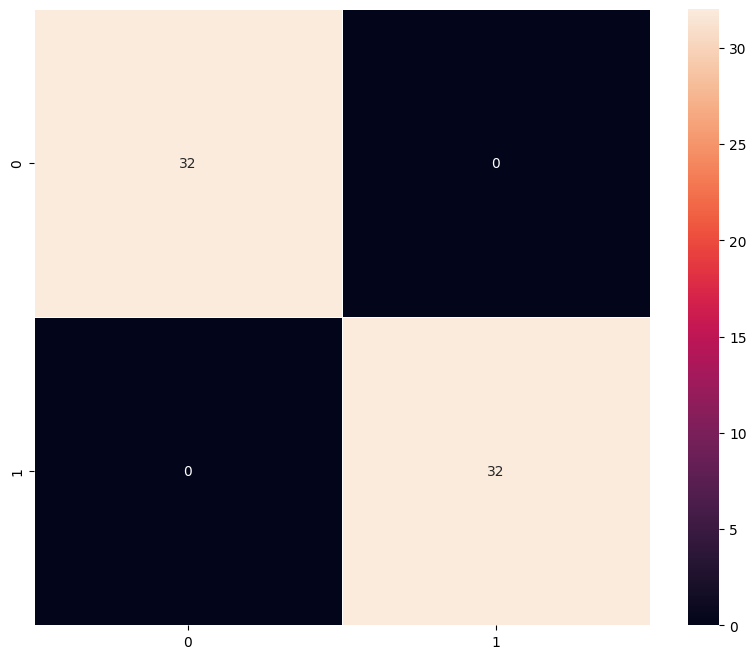

In [80]:
plot_confusion_matrix(model_2, X_test_normalized,y_test)

In [81]:
model_2_test_perf = model_performance_classification(model_2, X_test_normalized,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [82]:
model_2_test_perf

Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

!jupyter nbconvert --to html Hana_Mekonnen_HelmNet_Full_Code.ipynb

# **Actionable Insights & Recommendations**

- Simple CNN based model shows signs of overfitting

- The VGG-16 (Base) model achieved a train F1-score of ~1 and a validation F1-score of 1, showing the value of pre-trained features with generalizes better and does not exhibit overfitting.

- Adding a feed-forward neural network on top of VGG-16 improved performance by better adapting the model to the dataset.

- Model performance can be enhanced by trying different filter sizes, varying the number of filters, original image size, more data augmentation and adjusting the dropout rate.

- Exploring other transfer learning architectures may lead to better classification outcomes.

-
-

<font size=5 color='blue'>Power Ahead!</font>
___